In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime
import tensorflow as tf

In [ ]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list= [AAPL, GOOG, MSFT, AMZN]

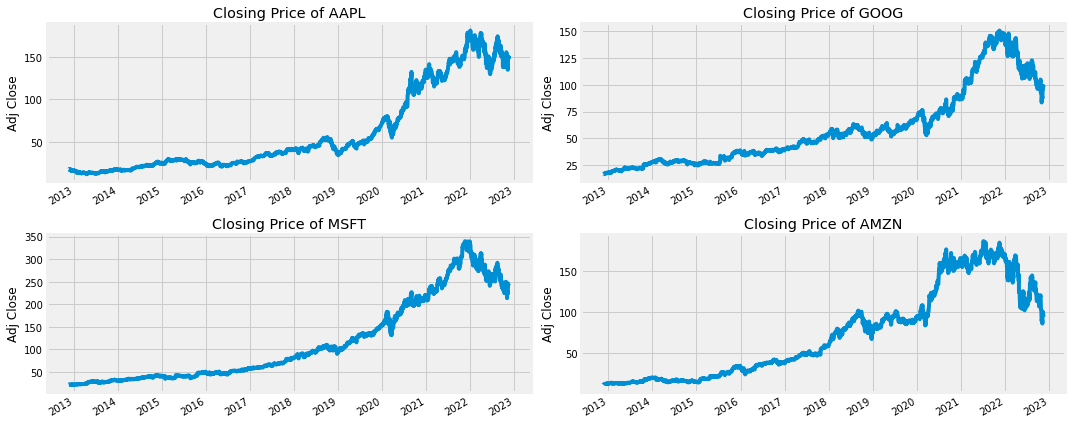

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

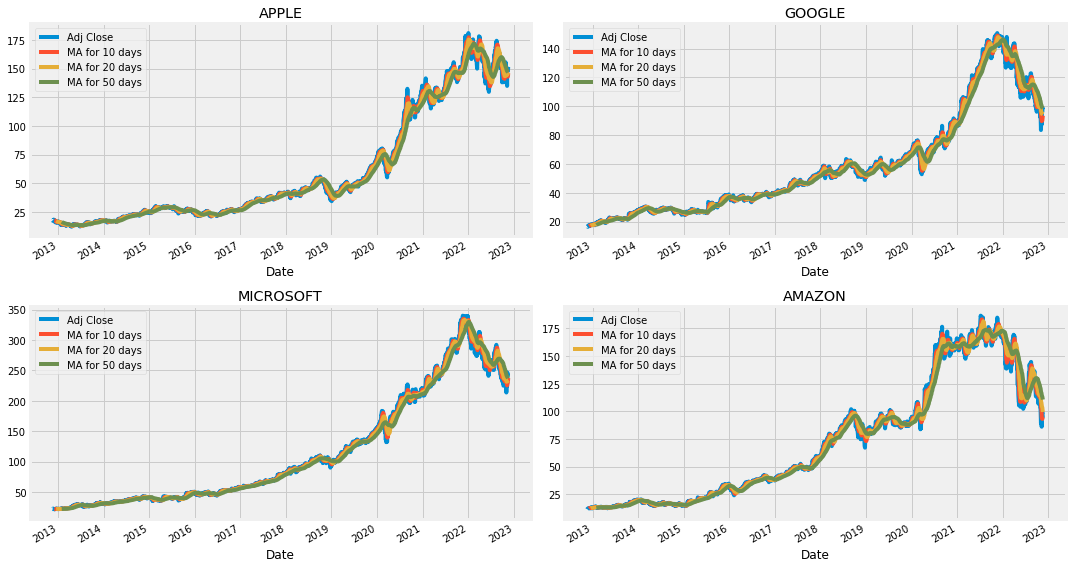

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

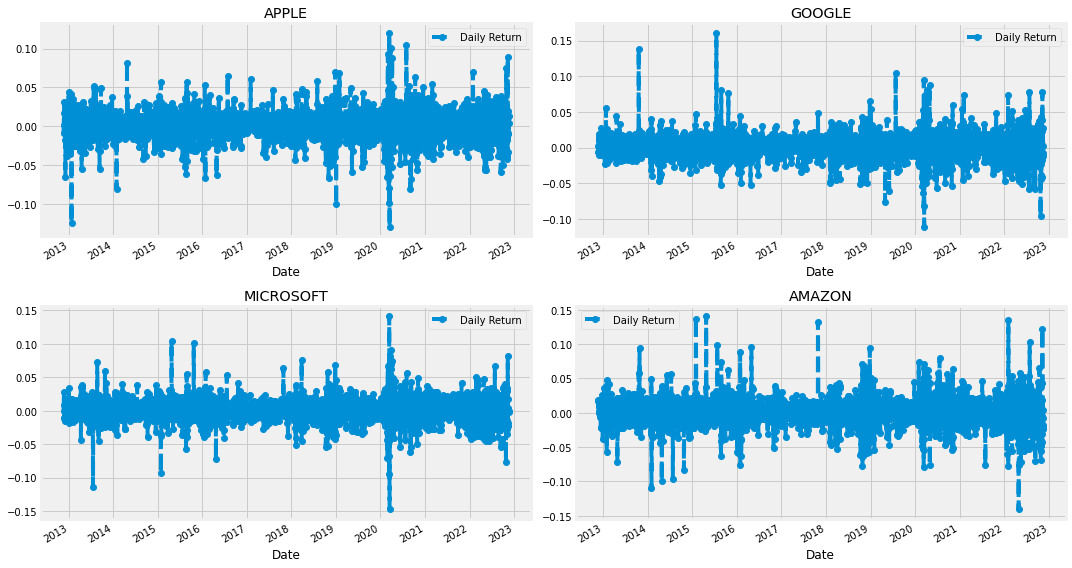

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

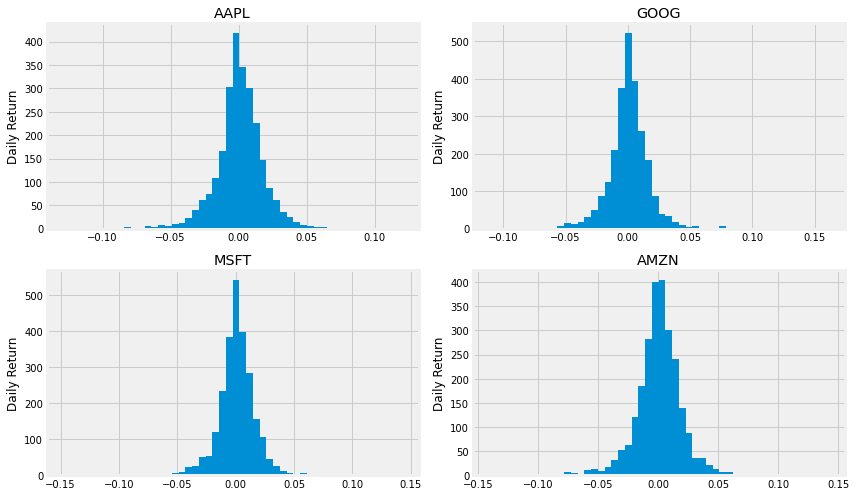

In [ ]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{tech_list[i - 1]}')
    
plt.tight_layout()

In [ ]:
data = MSFT.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .90 ))
training_data_len

2268

In [ ]:
dataset

array([[ 26.72999954],
       [ 26.70999908],
       [ 26.95000076],
       ...,
       [241.72999573],
       [241.67999268],
       [241.22000122]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max= MinMaxScaler()
scaled_price= min_max.fit_transform(dataset)

In [ ]:
train_data = scaled_price[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00113657, 0.00107343, 0.00183115, 0.00419903, 0.0032203 ,
       0.00224158, 0.00312559, 0.00183115, 0.00078929, 0.00018943,
       0.        , 0.00094715, 0.00113657, 0.00028414, 0.00179958,
       0.0029993 , 0.00274673, 0.0023363 , 0.00138915, 0.00230473,
       0.00375702, 0.00296773, 0.00413588, 0.00340974, 0.00217844,
       0.00154701, 0.00186272, 0.00056828, 0.00107343, 0.00394645,
       0.0027783 , 0.00116815, 0.00101029, 0.00056828, 0.00104186,
       0.00028414, 0.00145229, 0.00164172, 0.00265201, 0.0021153 ,
       0.0027783 , 0.0027783 , 0.00246258, 0.00391488, 0.00397802,
       0.00476731, 0.00486203, 0.00517775, 0.0046726 , 0.00340974,
       0.00492517, 0.00337816, 0.00356759, 0.00306245, 0.00287302,
       0.00372545, 0.00470417, 0.00476731, 0.00524089, 0.00527246])]
[0.00517774663711458]

[array([0.00113657, 0.00107343, 0.00183115, 0.00419903, 0.0032203 ,
       0.00224158, 0.00312559, 0.00183115, 0.00078929, 0.00018943,
       0.        , 0.00094715, 0.00

In [ ]:
x_train.shape

(2208, 60, 1)

In [ ]:
from timeit import default_timer as timer
import keras
class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(float("{:.2f}".format(timer()-self.starttime)))

cb = TimingCallback()

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 16.1 MB/s 


In [ ]:
from livelossplot import PlotLossesKeras

In [ ]:
class Histories(keras.callbacks.Callback):

    def on_train_begin(self,logs={}):
        self.losses = []
        self.accuracies = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('acc'))
histories = Histories()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math


batch_sizes= [1, 8,  16, 32, 64, 256,
              512, x_train.shape[0]]

print(batch_sizes)

test_data = scaled_price[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

rmse_values= []
pred_values= []
losses= []
for batch in batch_sizes:
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= batch, epochs=10, callbacks= [cb])
    predictions = model.predict(x_test)
    predictions = min_max.inverse_transform(predictions)
    pred_values.append(predictions)
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    rmse_values.append(rmse)

[1, 8, 16, 32, 64, 256, 512, 2208]
Epoch 1/10
2208/2208 [==============================] - 23s 9ms/step - loss: 0.0012
Epoch 2/10
2208/2208 [==============================] - 21s 9ms/step - loss: 3.7807e-04
Epoch 3/10
2208/2208 [==============================] - 20s 9ms/step - loss: 4.4682e-04
Epoch 4/10
2208/2208 [==============================] - 22s 10ms/step - loss: 2.7223e-04
Epoch 5/10
2208/2208 [==============================] - 21s 9ms/step - loss: 2.0298e-04
Epoch 6/10
2208/2208 [==============================] - 20s 9ms/step - loss: 2.7599e-04
Epoch 7/10
2208/2208 [==============================] - 20s 9ms/step - loss: 1.9000e-04
Epoch 8/10
2208/2208 [==============================] - 20s 9ms/step - loss: 1.5804e-04
Epoch 9/10
2208/2208 [==============================] - 20s 9ms/step - loss: 1.5147e-04
Epoch 10/10
8/8 [==============================] - 1s 5ms/step
Epoch 1/10
276/276 [==============================] - 5s 8ms/step - loss: 0.0022
Epoch 2/10
276/276 [============

In [ ]:
sum1= 0
time= []
for k in range(len(cb.logs)):
    sum1+= cb.logs[k]
    if((k+1)%10== 0):
        time.append(sum1)
        sum1= 0

In [ ]:
time

[223.85000000000002,
 79.21000000000002,
 18.08,
 10.169999999999998,
 7.68,
 4.630000000000001,
 3.76,
 3.0699999999999994]

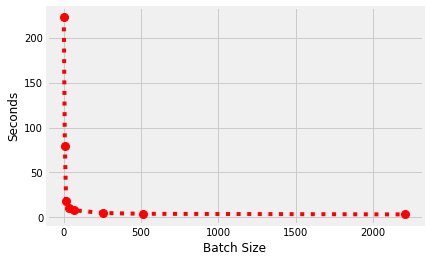

In [ ]:
plt.plot(batch_sizes, time, 'r-o', markersize= 8, linestyle= 'dotted')
plt.xlabel('Batch Size')
plt.ylabel('Seconds')
plt.show();

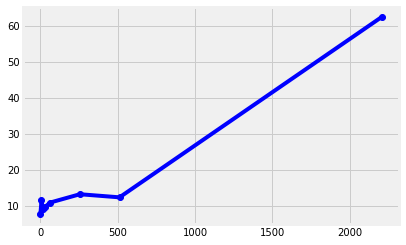

In [ ]:
plt.plot(batch_sizes, rmse_values, 'b-o')
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

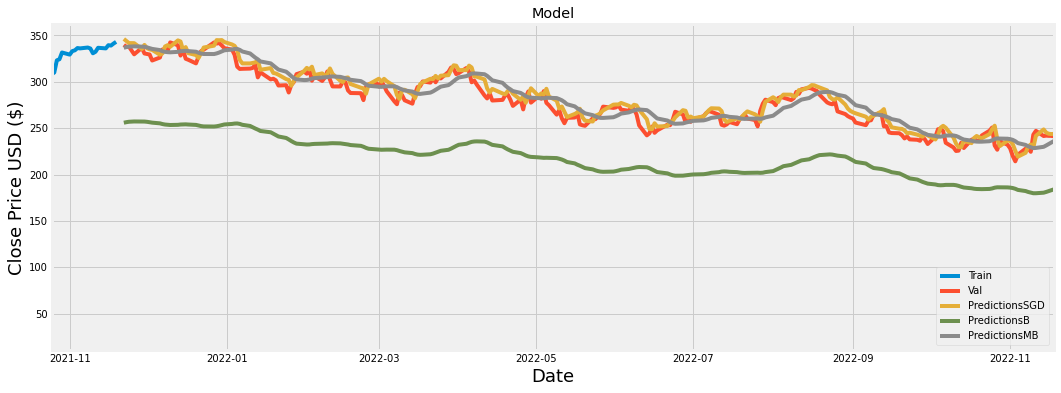

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['PredictionsSGD'] = pred_values[0]
valid['PredictionsB']= pred_values[-1]
valid['PredictionsMB']= pred_values[4]
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'PredictionsSGD', 'PredictionsB', 'PredictionsMB']])
plt.legend(['Train', 'Val', 'PredictionsSGD', 'PredictionsB','PredictionsMB'], loc='lower right')
plt.xlim(train.index[-20], valid.index[-1])
plt.show()